In [1]:
import pandas as pd
import numpy as np 
import json
import requests
from urllib.request import urlopen

## Load in 2009 crime data, test it out, see what we need to do

In [2]:
# Read Data source
dfs_09 = pd.read_csv('data/HPD_Crime/UCR09_crime.csv')

In [3]:
dfs_09.head()

,Unnamed: 0,ObjectID,Status,Score,Match_type,Side,X,Y,Match_addr,ARC_Street,...,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses,X__1,Address.1,City.1,State.1
0,1,1,M,81.378428,A,R,-95.322341,29.801320,"4500 WIPPRECHT ST, HOUSTON, TX, 77026",4500 WIPPRECHT ST,...,13R,4500-4599,WIPPRECHT,ST,-,1.0,NaN,4500 WIPPRECHT ST,HOUSTON,TX
1,2,2,M,81.378428,A,L,-95.478453,29.731622,"5700 RICHMOND AVE, HOUSTON, TX, 77057",5700 RICHMOND AVE,...,18N,5700-5799,RICHMOND,AVE,-,1.0,NaN,5700 RICHMOND AVE,HOUSTON,TX
2,3,3,M,81.378428,A,R,-95.299274,29.900101,"12200 SWAN RIVER DR, HOUSTON, TX, 77050",12200 SWAN RIVER DR,...,20D,12200-12299,SWAN RIVER,DR,-,1.0,NaN,12200 SWAN RIVER DR,HOUSTON,TX
3,4,4,M,81.378428,A,R,-95.351548,29.692139,"6600 LONDON ST, HOUSTON, TX, 77021",6600 LONDON ST,...,20A,6600-6699,LONDON,ST,-,1.0,NaN,6600 LONDON ST,HOUSTON,TX
4,5,5,M,81.378428,A,R,-95.492678,29.671037,"5900 DUMFRIES DR, HOUSTON, TX, 77096",5900 DUMFRIES DR,...,20R,5900-5999,DUMFRIES,DR,-,1.0,NaN,5900 DUMFRIES DR,HOUSTON,TX


#### Look at how many rows and what the column names are, we needto get rid of 

In [4]:
print(dfs_09.columns)
dfs_09.shape

Index(['Unnamed: 0', 'ObjectID', 'Status', 'Score', 'Match_type', 'Side', 'X',
       'Y', 'Match_addr', 'ARC_Street', 'ARC_City', 'ARC_State', 'ARC_ZIP',
       'Field1', 'Address', 'City', 'State', 'coords.x1', 'coords.x2', 'X1',
       'Date', 'Hour', 'Offense Type', 'Beat', 'Premise', 'Block Range',
       'Street Name', 'Type', 'Suffix', '# Of Offenses', 'X__1', 'Address.1',
       'City.1', 'State.1'],
      dtype='object')


(130875, 34)

### Drop These rows and make new column names that will go with all sheets

In [5]:
dfs_09_clean = dfs_09.drop(columns=['Unnamed: 0', 'ObjectID', 'Status', 'Score', 'Match_type', 'Side', 'Match_addr', 'ARC_Street', 'ARC_City', 'ARC_State','ARC_ZIP', 
                    'Field1', 'coords.x1', 'coords.x2', 'X1', 'Premise','Suffix', '# Of Offenses', 'X__1', 'Address.1', 'City.1', 'State.1'])

In [6]:
print(dfs_09_clean.columns)
columnNames = ['X', 'Y', 'Address', 'City', 'State', 'Date', 'Hour', 'OffenseType',
       'Beats', 'BlockRange', 'StreetName', 'Type']

Index(['X', 'Y', 'Address', 'City', 'State', 'Date', 'Hour', 'Offense Type',
       'Beat', 'Block Range', 'Street Name', 'Type'],
      dtype='object')


In [7]:
dfs_09_clean.columns = columnNames
print(dfs_09_clean.columns)

Index(['X', 'Y', 'Address', 'City', 'State', 'Date', 'Hour', 'OffenseType',
       'Beats', 'BlockRange', 'StreetName', 'Type'],
      dtype='object')


In [8]:
dfs_09_clean.to_csv('data/HPD_Crime/Crime_09.csv',index=False)

## Repeat with other years

In [9]:
dfs_10 = pd.read_csv('data/HPD_Crime/UCR10_crime.csv')
dfs_11 = pd.read_csv('data/HPD_Crime/UCR11_crime.csv')


In [10]:
dfs_12 = pd.read_csv('data/HPD_Crime/UCR12_crime.csv')
dfs_13 = pd.read_csv('data/HPD_Crime/UCR13_crime.csv')
dfs_14 = pd.read_csv('data/HPD_Crime/UCR14_crime.csv')
dfs_15 = pd.read_csv('data/HPD_Crime/UCR15_crime.csv')

C:\Users\ivvya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
print(dfs_10.shape)
print(dfs_11.shape)
print(dfs_10.columns)
print(dfs_11.columns)

(116704, 35)
(117015, 33)
Index(['Unnamed: 0', 'ObjectID', 'Status', 'Score', 'Match_type', 'Side', 'X',
       'Y', 'Match_addr', 'ARC_Street', 'ARC_City', 'ARC_State', 'ARC_ZIP',
       'Field1', 'Address', 'City', 'State', 'coords.x1', 'coords.x2', 'X1',
       'Date', 'Hour', 'Offense Type', 'Beat', 'Premise', 'Block Range',
       'Street Name', 'Type', 'Suffix', '# Of Offenses', 'Field11', 'X__1',
       'Address.1', 'City.1', 'State.1'],
      dtype='object')
Index(['Unnamed: 0', 'ObjectID', 'Status', 'Score', 'Match_type', 'Side', 'X',
       'Y', 'Match_addr', 'ARC_Street', 'ARC_City', 'ARC_State', 'ARC_ZIP',
       'Field1', 'Address', 'City', 'State', 'coords.x1', 'coords.x2', 'X1',
       'Date', 'Hour', 'Offense Type', 'Beat', 'Premise', 'Block Range',
       'Street Name', 'Type', 'Suffix', '# Of Offenses', 'Address.1', 'City.1',
       'State.1'],
      dtype='object')


In [12]:
dfs_10_clean = dfs_10.drop(columns=['Unnamed: 0', 'ObjectID', 'Status', 'Score', 'Match_type', 'Side', 'Match_addr', 'ARC_Street', 'ARC_City', 'ARC_State','ARC_ZIP', 
                    'Field1', 'Field11', 'coords.x1', 'coords.x2', 'X1', 'Premise','Suffix', '# Of Offenses', 'X__1', 'Address.1', 'City.1', 'State.1'])

In [13]:
dfs_10_clean.columns = columnNames
print(dfs_10_clean.columns)

Index(['X', 'Y', 'Address', 'City', 'State', 'Date', 'Hour', 'OffenseType',
       'Beats', 'BlockRange', 'StreetName', 'Type'],
      dtype='object')


In [14]:
dfs_11_clean = dfs_11.drop(columns=['Unnamed: 0', 'ObjectID', 'Status', 'Score', 'Match_type', 'Side', 'Match_addr', 'ARC_Street', 'ARC_City', 'ARC_State','ARC_ZIP', 
                    'coords.x1', 'coords.x2', 'X1', 'Premise','Suffix', '# Of Offenses', 'Address.1', 'City.1', 'State.1', 'Field1'])

In [15]:
dfs_11_clean.columns = columnNames

print(dfs_11_clean.columns)

Index(['X', 'Y', 'Address', 'City', 'State', 'Date', 'Hour', 'OffenseType',
       'Beats', 'BlockRange', 'StreetName', 'Type'],
      dtype='object')


In [16]:
dfs_12.columns

Index(['Unnamed: 0', 'ObjectID', 'Status', 'Score', 'Match_type', 'Side', 'X',
       'Y', 'Match_addr', 'ARC_Street', 'ARC_City', 'ARC_State', 'ARC_ZIP',
       'Field1', 'Address', 'City', 'State', 'coords.x1', 'coords.x2', 'X1',
       'Date', 'Hour', 'Offense Type', 'Beat', 'Premise', 'Block Range',
       'Street Name', 'Type', 'Suffix', '# Of Offenses', 'Address.1', 'City.1',
       'State.1'],
      dtype='object')

In [17]:
dfs_12_clean = dfs_12.drop(columns=['Unnamed: 0', 'ObjectID', 'Status', 'Score', 'Match_type', 'Side', 'Match_addr', 'ARC_Street', 'ARC_City', 'ARC_State','ARC_ZIP', 
                    'coords.x1', 'coords.x2', 'X1', 'Premise','Suffix', '# Of Offenses', 'Address.1', 'City.1', 'State.1', 'Field1'])

In [18]:
dfs_12_clean.columns = columnNames
print(dfs_12_clean.columns)

Index(['X', 'Y', 'Address', 'City', 'State', 'Date', 'Hour', 'OffenseType',
       'Beats', 'BlockRange', 'StreetName', 'Type'],
      dtype='object')


In [19]:
dfs_13_clean = dfs_13.drop(columns=['Unnamed: 0', 'ObjectID', 'Status', 'Score', 'Match_type', 'Side', 'Match_addr', 'ARC_Street', 'ARC_City', 'ARC_State','ARC_ZIP', 
                    'coords.x1', 'coords.x2', 'X1', 'Premise','Suffix', '# Of Offenses', '# Of','Address.1', 'City.1', 'State.1', 'Field1'])

In [20]:
dfs_13_clean.columns = columnNames
print(dfs_13_clean.columns)

Index(['X', 'Y', 'Address', 'City', 'State', 'Date', 'Hour', 'OffenseType',
       'Beats', 'BlockRange', 'StreetName', 'Type'],
      dtype='object')


In [21]:
dfs_14_clean = dfs_14.drop(columns=['Unnamed: 0', 'ObjectID', 'Status', 'Score', 'Match_type', 'Side', 'Match_addr', 'ARC_Street', 'ARC_City', 'ARC_State','ARC_ZIP', 
                    'coords.x1', 'coords.x2', 'X1', 'Premise','Suffix', '# offenses', 'Address.1', 'City.1', 'State.1', 'Field1'])

In [22]:
dfs_14_clean.columns = columnNames
print(dfs_14_clean.columns)

Index(['X', 'Y', 'Address', 'City', 'State', 'Date', 'Hour', 'OffenseType',
       'Beats', 'BlockRange', 'StreetName', 'Type'],
      dtype='object')


In [23]:
dfs_15_clean = dfs_15.drop(columns=['Unnamed: 0', 'ObjectID', 'Status', 'Score', 'Match_type', 'Side', 'Match_addr', 'ARC_Street', 'ARC_City', 'ARC_State','ARC_ZIP', 
                    'coords.x1', 'coords.x2', 'X1', 'Premise','Suffix', '# offenses', 'Address.1', 'City.1', 'State.1', 'Field1'])

In [24]:
dfs_15_clean.columns = columnNames
print(dfs_15_clean.columns)

Index(['X', 'Y', 'Address', 'City', 'State', 'Date', 'Hour', 'OffenseType',
       'Beats', 'BlockRange', 'StreetName', 'Type'],
      dtype='object')


In [25]:
merged_df = pd.concat([dfs_09_clean, dfs_10_clean, dfs_11_clean, dfs_12_clean, dfs_13_clean, dfs_14_clean, dfs_15_clean])


In [26]:
merged_df.to_csv('data/HPD_Crime/Crime_09_15.csv',index=False)

In [27]:
merged_df.head()

,X,Y,Address,City,State,Date,Hour,OffenseType,Beats,BlockRange,StreetName,Type
0,-95.322341,29.801320,4500 WIPPRECHT ST,HOUSTON,TX,1980-05-01,12,Aggravated Assault,7C20,4500-4599,WIPPRECHT,ST
1,-95.478453,29.731622,5700 RICHMOND AVE,HOUSTON,TX,1984-08-26,1,Theft,18F30,5700-5799,RICHMOND,AVE
2,-95.299274,29.900101,12200 SWAN RIVER DR,HOUSTON,TX,2000-08-13,17,Theft,8C60,12200-12299,SWAN RIVER,DR
3,-95.351548,29.692139,6600 LONDON ST,HOUSTON,TX,2001-08-20,20,Theft,14D10,6600-6699,LONDON,ST
4,-95.492678,29.671037,5900 DUMFRIES DR,HOUSTON,TX,2002-01-01,8,Theft,15E10,5900-5999,DUMFRIES,DR


In [28]:
HPDbeats = pd.read_csv('data/HPD_Crime/Houston_Police_Beats.csv')
merge_test = merged_df
HPDbeats.head()

,OBJECTID_12,OBJECTID_1,OBJECTID,Beats,District,Beats_0,Area_sq_mi,Perimet_mi,Shape_Leng
0,1,1,104,23J40,23,23J40,3.039335,9.254984,48866.313742
1,2,2,105,23J50,23,23J50,2.123895,7.153639,37771.213441
2,3,3,1,1A10,1,01A10,1.746467,6.236709,32929.823999
3,4,4,2,1A20,1,01A20,2.441331,7.953352,41993.697388
4,5,5,3,1A30,1,01A30,2.659169,8.026355,42379.151925


In [29]:
HPDbeats = HPDbeats.drop(columns = ['OBJECTID_12', 'OBJECTID_1', 'OBJECTID', 'District', 'Beats_0'])
HPDbeats.head()

,Beats,Area_sq_mi,Perimet_mi,Shape_Leng
0,23J40,3.039335,9.254984,48866.313742
1,23J50,2.123895,7.153639,37771.213441
2,1A10,1.746467,6.236709,32929.823999
3,1A20,2.441331,7.953352,41993.697388
4,1A30,2.659169,8.026355,42379.151925


In [30]:
merge_test = merge_test.join(HPDbeats.set_index('Beats'), on='Beats')

In [31]:
merge_test.head()
merge_test.shape
merge_test.to_csv('data/HPD_Crime/Crime_09_15.csv',index=False)

### The rest of 2016

In [32]:
aug_16 = pd.read_excel('data/HPD_Crime/dirty_data/aug16.xlsx')
sep_16 = pd.read_excel('data/HPD_Crime/dirty_data/sep16.xlsx')
oct_16 = pd.read_excel('data/HPD_Crime/dirty_data/oct16.xlsx')
nov_16 = pd.read_excel('data/HPD_Crime/dirty_data/nov16.xlsx')
dec_16 = pd.read_excel('data/HPD_Crime/dirty_data/dec16.xlsx')

In [33]:
aug_16.head()

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2016-08-24,5,Theft,10H10,Apartment Parking Lot,2100-2199,RUNNELS,-,-,1
1,2016-08-24,19,Aggravated Assault,10H10,Convenience Store Parking Lot,2000-2099,RUNNELS,-,-,1
2,2016-08-25,10,Theft,10H10,Residence or House,2300-2399,COMMERCE,ST,-,1
3,2016-08-25,12,Aggravated Assault,10H10,Other Parking Lot,500-599,LOCKWOOD,DR,-,1
4,2016-08-25,13,Theft,10H10,Commercial Parking Lot or Garage,100-199,N. GREENWOOD,ST,-,1


In [34]:
df_16 = pd.concat([aug_16, sep_16, oct_16, nov_16, dec_16])
df_16 = df_16.drop(columns=['Suffix', '# offenses'])


In [35]:
test= df_16
test.head()

test["Type"] = test["Type"].replace({'-': 'ST'})

In [36]:
test.head()

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type
0,2016-08-24,5,Theft,10H10,Apartment Parking Lot,2100-2199,RUNNELS,ST
1,2016-08-24,19,Aggravated Assault,10H10,Convenience Store Parking Lot,2000-2099,RUNNELS,ST
2,2016-08-25,10,Theft,10H10,Residence or House,2300-2399,COMMERCE,ST
3,2016-08-25,12,Aggravated Assault,10H10,Other Parking Lot,500-599,LOCKWOOD,DR
4,2016-08-25,13,Theft,10H10,Commercial Parking Lot or Garage,100-199,N. GREENWOOD,ST


In [37]:
address = test["BlockRange"].str.split("-", n = 1, expand = True) 

In [38]:
print(address.head())
address = address.drop(columns=[0])

      0     1
0  2100  2199
1  2000  2099
2  2300  2399
3   500   599
4   100   199


In [39]:
newColumn = ["Address"]
address.columns = newColumn
address.head()

,Address
0,2199
1,2099
2,2399
3,599
4,199


In [40]:
test["Block"] = address
test.head()


,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Block
0,2016-08-24,5,Theft,10H10,Apartment Parking Lot,2100-2199,RUNNELS,ST,2199
1,2016-08-24,19,Aggravated Assault,10H10,Convenience Store Parking Lot,2000-2099,RUNNELS,ST,2099
2,2016-08-25,10,Theft,10H10,Residence or House,2300-2399,COMMERCE,ST,2399
3,2016-08-25,12,Aggravated Assault,10H10,Other Parking Lot,500-599,LOCKWOOD,DR,599
4,2016-08-25,13,Theft,10H10,Commercial Parking Lot or Garage,100-199,N. GREENWOOD,ST,199


In [41]:
test.StreetName.astype(str)
test.Type.astype(str)
test.Block.astype(str)
test.head()

,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Block
0,2016-08-24,5,Theft,10H10,Apartment Parking Lot,2100-2199,RUNNELS,ST,2199
1,2016-08-24,19,Aggravated Assault,10H10,Convenience Store Parking Lot,2000-2099,RUNNELS,ST,2099
2,2016-08-25,10,Theft,10H10,Residence or House,2300-2399,COMMERCE,ST,2399
3,2016-08-25,12,Aggravated Assault,10H10,Other Parking Lot,500-599,LOCKWOOD,DR,599
4,2016-08-25,13,Theft,10H10,Commercial Parking Lot or Garage,100-199,N. GREENWOOD,ST,199


In [42]:
test['Address'] = test['Block'].str.cat(test['StreetName'],sep=" ")

In [43]:
test['Address'] = test['Address'].str.cat(test['Type'],sep = " ")
test.head()


,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Block,Address
0,2016-08-24,5,Theft,10H10,Apartment Parking Lot,2100-2199,RUNNELS,ST,2199,2199 RUNNELS ST
1,2016-08-24,19,Aggravated Assault,10H10,Convenience Store Parking Lot,2000-2099,RUNNELS,ST,2099,2099 RUNNELS ST
2,2016-08-25,10,Theft,10H10,Residence or House,2300-2399,COMMERCE,ST,2399,2399 COMMERCE ST
3,2016-08-25,12,Aggravated Assault,10H10,Other Parking Lot,500-599,LOCKWOOD,DR,599,599 LOCKWOOD DR
4,2016-08-25,13,Theft,10H10,Commercial Parking Lot or Garage,100-199,N. GREENWOOD,ST,199,199 N. GREENWOOD ST


In [44]:
test.rename(columns={'Beat':'Beats'}, inplace=True)

In [45]:
test.head()

,Date,Hour,Offense Type,Beats,Premise,BlockRange,StreetName,Type,Block,Address
0,2016-08-24,5,Theft,10H10,Apartment Parking Lot,2100-2199,RUNNELS,ST,2199,2199 RUNNELS ST
1,2016-08-24,19,Aggravated Assault,10H10,Convenience Store Parking Lot,2000-2099,RUNNELS,ST,2099,2099 RUNNELS ST
2,2016-08-25,10,Theft,10H10,Residence or House,2300-2399,COMMERCE,ST,2399,2399 COMMERCE ST
3,2016-08-25,12,Aggravated Assault,10H10,Other Parking Lot,500-599,LOCKWOOD,DR,599,599 LOCKWOOD DR
4,2016-08-25,13,Theft,10H10,Commercial Parking Lot or Garage,100-199,N. GREENWOOD,ST,199,199 N. GREENWOOD ST


In [46]:
test = test.join(HPDbeats.set_index('Beats'), on='Beats')


In [47]:
geocode_test = test.head(1000)

In [48]:
geocode_test


,Date,Hour,Offense Type,Beats,Premise,BlockRange,StreetName,Type,Block,Address,Area_sq_mi,Perimet_mi,Shape_Leng
0,2016-08-24,5,Theft,10H10,Apartment Parking Lot,2100-2199,RUNNELS,ST,2199,2199 RUNNELS ST,2.818307,8.066706,42592.208874
1,2016-08-24,19,Aggravated Assault,10H10,Convenience Store Parking Lot,2000-2099,RUNNELS,ST,2099,2099 RUNNELS ST,2.818307,8.066706,42592.208874
2,2016-08-25,10,Theft,10H10,Residence or House,2300-2399,COMMERCE,ST,2399,2399 COMMERCE ST,2.818307,8.066706,42592.208874
3,2016-08-25,12,Aggravated Assault,10H10,Other Parking Lot,500-599,LOCKWOOD,DR,599,599 LOCKWOOD DR,2.818307,8.066706,42592.208874
4,2016-08-25,13,Theft,10H10,Commercial Parking Lot or Garage,100-199,N. GREENWOOD,ST,199,199 N. GREENWOOD ST,2.818307,8.066706,42592.208874
5,2016-08-25,14,Theft,10H10,"Road, Street, or Sidewalk",2300-2399,COMMERCE,ST,2399,2399 COMMERCE ST,2.818307,8.066706,42592.208874
6,2016-08-25,21,Theft,10H10,"Road, Street, or Sidewalk",400-499,EDGEWOOD,ST,499,499 EDGEWOOD ST,2.818307,8.066706,42592.208874
7,2016-08-27,15,Robbery,10H10,Car Wash,5300-5399,HARRISBURG,ST,5399,5399 HARRISBURG ST,2.818307,8.066706,42592.208874
8,2016-08-28,1,Aggravated Assault,10H10,Apartment,UNK,BRYAN,ST,None,NaN,2.818307,8.066706,42592.208874
9,2016-08-28,11,Theft,10H10,"Other, Unknown, or Not Listed",100-199,MILBY,ST,199,199 MILBY ST,2.818307,8.066706,42592.208874


In [49]:
# lat = []
# lon = []

# for x in range(0,len(geocode_test)):
#     try:
#         print(geocode_test['Address'][x])
#         URL = 'https://nominatim.openstreetmap.org/search?q='+ geocode_test['Address'][x] + ',Houston,Tx&format=json'
#         row = requests.get(URL)
#         lat.append(row.json()[0]['lat'])
#         lon.append(row.json()[0]['lon'])
#         print('-----APPEND DONE------')
#     except:
#         lat.append('-')
#         lon.append('-')
#         pass
# 'https://nominatim.openstreetmap.org/search?q='+ df['Address'] + ',Houston,Tx

In [50]:
# geocode_test['lat'] = lat
# geocode_test['lon'] = lon

# geocode_test

In [51]:
# geocode_test = geocode_test[geocode_test.lat != '-']
# geocode_test.shape

In [52]:
# lat = []
# lon = []

# for x in range(0,len(test)):
#     try:
#         print(test['Address'][x])
#         URL = 'https://nominatim.openstreetmap.org/search?q='+ test['Address'][x] + ',Houston,Tx&format=json'
#         row = requests.get(URL)
#         lat.append(row.json()[0]['lat'])
#         lon.append(row.json()[0]['lon'])
#         print('-----APPEND DONE------')
#     except:
#         lat.append('-')
#         lon.append('-')
#         pass
# 'https://nominatim.openstreetmap.org/search?q='+ df['Address'] + ',Houston,Tx

In [53]:
# test['lat'] = lat
# test['lon'] = lon

In [54]:
# test.head(50)

In [55]:
# test1 = test[test.lat != '-']

In [56]:
# test1.shape

In [57]:
test["City"] = "Houston"
test["State"] = "TX"

In [58]:
test.head()

,Date,Hour,Offense Type,Beats,Premise,BlockRange,StreetName,Type,Block,Address,Area_sq_mi,Perimet_mi,Shape_Leng,City,State
0,2016-08-24,5,Theft,10H10,Apartment Parking Lot,2100-2199,RUNNELS,ST,2199,2199 RUNNELS ST,2.818307,8.066706,42592.208874,Houston,TX
1,2016-08-24,19,Aggravated Assault,10H10,Convenience Store Parking Lot,2000-2099,RUNNELS,ST,2099,2099 RUNNELS ST,2.818307,8.066706,42592.208874,Houston,TX
2,2016-08-25,10,Theft,10H10,Residence or House,2300-2399,COMMERCE,ST,2399,2399 COMMERCE ST,2.818307,8.066706,42592.208874,Houston,TX
3,2016-08-25,12,Aggravated Assault,10H10,Other Parking Lot,500-599,LOCKWOOD,DR,599,599 LOCKWOOD DR,2.818307,8.066706,42592.208874,Houston,TX
4,2016-08-25,13,Theft,10H10,Commercial Parking Lot or Garage,100-199,N. GREENWOOD,ST,199,199 N. GREENWOOD ST,2.818307,8.066706,42592.208874,Houston,TX


In [59]:
address_df = test[['Address', 'City', 'State']].copy()

In [60]:
address_df.head()
address_df.to_csv('data/HPD_Crime/address_16.csv',index=False)

## Rest of 2017 data

In [61]:
jan_17 = pd.read_excel('data/HPD_Crime/dirty_data/jan17.xlsx')
feb_17 = pd.read_excel('data/HPD_Crime/dirty_data/feb17.xlsx')
mar_17 = pd.read_excel('data/HPD_Crime/dirty_data/mar17.xlsx')
apr_17 = pd.read_excel('data/HPD_Crime/dirty_data/apr17.xlsx')
may_17 = pd.read_excel('data/HPD_Crime/dirty_data/may17.xlsx')
jun_17 = pd.read_excel('data/HPD_Crime/dirty_data/jun17.xlsx')
jul_17 = pd.read_excel('data/HPD_Crime/dirty_data/jul17.xlsx')
aug_17 = pd.read_excel('data/HPD_Crime/dirty_data/aug17.xlsx')
sep_17 = pd.read_excel('data/HPD_Crime/dirty_data/sep17.xlsx')
oct_17 = pd.read_excel('data/HPD_Crime/dirty_data/oct17.xlsx')
nov_17 = pd.read_excel('data/HPD_Crime/dirty_data/nov17.xlsx')
dec_17 = pd.read_excel('data/HPD_Crime/dirty_data/dec17.xlsx')

In [62]:
df_17 = pd.concat([jan_17, feb_17, mar_17, apr_17, may_17, jun_17, jul_17, aug_17, sep_17, oct_17, nov_17, dec_17])
df_17 = df_17.drop(columns=['Suffix', 'Offenses', 'Block Range', 'Street Name'])
df_17.head()

C:\Users\ivvya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,# offenses,Beat,BlockRange,Date,Hour,Offense Type,Premise,StreetName,Type
0,1.0,10H10,300-399,2017-01-22 00:00:00,12,Theft,Apartment,LIVE OAK,ST
1,1.0,10H10,300-399,2017-01-23 00:00:00,9,Theft,Residence or House,ENNIS,ST
2,1.0,10H10,2100-2199,2017-01-24 00:00:00,10,Theft,Apartment Parking Lot,CANAL,ST
3,1.0,10H10,2800-2899,2017-01-24 00:00:00,12,Theft,Apartment Parking Lot,CANAL,ST
4,1.0,10H10,2100-2199,2017-01-24 00:00:00,22,Theft,Apartment Parking Lot,RUNNELS,-


In [63]:
df_17["Type"] = df_17["Type"].replace({'-': 'ST'})

In [64]:
address_17 = df_17["BlockRange"].str.split("-", n = 1, expand = True) 

In [65]:
print(address_17.head())
address_17 = address_17.drop(columns=[0])

      0     1
0   300   399
1   300   399
2  2100  2199
3  2800  2899
4  2100  2199


In [66]:
newColumn = ["Address"]
address_17.columns = newColumn
address_17.head()

,Address
0,399
1,399
2,2199
3,2899
4,2199


In [67]:
df_17["Block"] = address_17
df_17.head()


,# offenses,Beat,BlockRange,Date,Hour,Offense Type,Premise,StreetName,Type,Block
0,1.0,10H10,300-399,2017-01-22 00:00:00,12,Theft,Apartment,LIVE OAK,ST,399
1,1.0,10H10,300-399,2017-01-23 00:00:00,9,Theft,Residence or House,ENNIS,ST,399
2,1.0,10H10,2100-2199,2017-01-24 00:00:00,10,Theft,Apartment Parking Lot,CANAL,ST,2199
3,1.0,10H10,2800-2899,2017-01-24 00:00:00,12,Theft,Apartment Parking Lot,CANAL,ST,2899
4,1.0,10H10,2100-2199,2017-01-24 00:00:00,22,Theft,Apartment Parking Lot,RUNNELS,ST,2199


In [68]:
df_17.StreetName.astype(str)
df_17.Type.astype(str)
df_17.Block.astype(str)
df_17.head()

,# offenses,Beat,BlockRange,Date,Hour,Offense Type,Premise,StreetName,Type,Block
0,1.0,10H10,300-399,2017-01-22 00:00:00,12,Theft,Apartment,LIVE OAK,ST,399
1,1.0,10H10,300-399,2017-01-23 00:00:00,9,Theft,Residence or House,ENNIS,ST,399
2,1.0,10H10,2100-2199,2017-01-24 00:00:00,10,Theft,Apartment Parking Lot,CANAL,ST,2199
3,1.0,10H10,2800-2899,2017-01-24 00:00:00,12,Theft,Apartment Parking Lot,CANAL,ST,2899
4,1.0,10H10,2100-2199,2017-01-24 00:00:00,22,Theft,Apartment Parking Lot,RUNNELS,ST,2199


In [69]:
df_17['Address'] = df_17['Block'].str.cat(df_17['StreetName'],sep=" ")


In [70]:
df_17['Address'] = df_17['Address'].str.cat(df_17['Type'],sep = " ")
df_17.head()

,# offenses,Beat,BlockRange,Date,Hour,Offense Type,Premise,StreetName,Type,Block,Address
0,1.0,10H10,300-399,2017-01-22 00:00:00,12,Theft,Apartment,LIVE OAK,ST,399,399 LIVE OAK ST
1,1.0,10H10,300-399,2017-01-23 00:00:00,9,Theft,Residence or House,ENNIS,ST,399,399 ENNIS ST
2,1.0,10H10,2100-2199,2017-01-24 00:00:00,10,Theft,Apartment Parking Lot,CANAL,ST,2199,2199 CANAL ST
3,1.0,10H10,2800-2899,2017-01-24 00:00:00,12,Theft,Apartment Parking Lot,CANAL,ST,2899,2899 CANAL ST
4,1.0,10H10,2100-2199,2017-01-24 00:00:00,22,Theft,Apartment Parking Lot,RUNNELS,ST,2199,2199 RUNNELS ST


In [71]:
df_17.rename(columns={'Beat':'Beats'}, inplace=True)

In [72]:
df_17 = df_17.join(HPDbeats.set_index('Beats'), on='Beats')

In [73]:
df_17["City"] = "Houston"
df_17["State"] = "TX"

In [74]:
df_17.head()

,# offenses,Beats,BlockRange,Date,Hour,Offense Type,Premise,StreetName,Type,Block,Address,Area_sq_mi,Perimet_mi,Shape_Leng,City,State
0,1.0,10H10,300-399,2017-01-22 00:00:00,12,Theft,Apartment,LIVE OAK,ST,399,399 LIVE OAK ST,2.818307,8.066706,42592.208874,Houston,TX
1,1.0,10H10,300-399,2017-01-23 00:00:00,9,Theft,Residence or House,ENNIS,ST,399,399 ENNIS ST,2.818307,8.066706,42592.208874,Houston,TX
2,1.0,10H10,2100-2199,2017-01-24 00:00:00,10,Theft,Apartment Parking Lot,CANAL,ST,2199,2199 CANAL ST,2.818307,8.066706,42592.208874,Houston,TX
3,1.0,10H10,2800-2899,2017-01-24 00:00:00,12,Theft,Apartment Parking Lot,CANAL,ST,2899,2899 CANAL ST,2.818307,8.066706,42592.208874,Houston,TX
4,1.0,10H10,2100-2199,2017-01-24 00:00:00,22,Theft,Apartment Parking Lot,RUNNELS,ST,2199,2199 RUNNELS ST,2.818307,8.066706,42592.208874,Houston,TX


In [75]:
address_17_df = test[['Address', 'City', 'State']].copy()
address_17_df.head()
address_17_df.to_csv('data/HPD_Crime/address_17.csv',index=False)

## Merge 16 address with lat and long to original 16 data

In [76]:
df_16 = test
df_16.head()

,Date,Hour,Offense Type,Beats,Premise,BlockRange,StreetName,Type,Block,Address,Area_sq_mi,Perimet_mi,Shape_Leng,City,State
0,2016-08-24,5,Theft,10H10,Apartment Parking Lot,2100-2199,RUNNELS,ST,2199,2199 RUNNELS ST,2.818307,8.066706,42592.208874,Houston,TX
1,2016-08-24,19,Aggravated Assault,10H10,Convenience Store Parking Lot,2000-2099,RUNNELS,ST,2099,2099 RUNNELS ST,2.818307,8.066706,42592.208874,Houston,TX
2,2016-08-25,10,Theft,10H10,Residence or House,2300-2399,COMMERCE,ST,2399,2399 COMMERCE ST,2.818307,8.066706,42592.208874,Houston,TX
3,2016-08-25,12,Aggravated Assault,10H10,Other Parking Lot,500-599,LOCKWOOD,DR,599,599 LOCKWOOD DR,2.818307,8.066706,42592.208874,Houston,TX
4,2016-08-25,13,Theft,10H10,Commercial Parking Lot or Garage,100-199,N. GREENWOOD,ST,199,199 N. GREENWOOD ST,2.818307,8.066706,42592.208874,Houston,TX


In [77]:
GeocodedAddress_16 = pd.read_csv('data/HPD_Crime/2016_GeocodedAddress.csv')

In [78]:
GeocodedAddress_16.head()

,ObjectID,Score,Match_type,Match_addr,Side,FromAddr,ToAddr,PreDir,PreType,StreetName,...,Addr_type,Status,ResultID,IN_Street,IN_City,IN_State,IN_ZIP,USER_Addre,USER_City,USER_State
0,1,89.04,A,"2199 Runnels, Houston, TX, 77003",L,-1,-1,-1,-1,-1,...,StreetAddress,M,1,2199 RUNNELS ST,Houston,TX,NaN,2199 RUNNELS ST,Houston,TX
1,2,89.04,A,"2099 Runnels, Houston, TX, 77003",L,-1,-1,-1,-1,-1,...,StreetAddress,M,2,2099 RUNNELS ST,Houston,TX,NaN,2099 RUNNELS ST,Houston,TX
2,3,89.04,A,"2399 Commerce, Houston, TX, 77002",L,-1,-1,-1,-1,-1,...,StreetAddress,M,3,2399 COMMERCE ST,Houston,TX,NaN,2399 COMMERCE ST,Houston,TX
3,4,89.04,A,"599 Lockwood, Houston, TX, 77011",L,-1,-1,-1,-1,-1,...,StreetAddress,M,4,599 LOCKWOOD DR,Houston,TX,NaN,599 LOCKWOOD DR,Houston,TX
4,5,89.04,A,"199 N Greenwood, Houston, TX, 77011",L,-1,-1,-1,-1,-1,...,StreetAddress,M,5,199 N. GREENWOOD ST,Houston,TX,NaN,199 N. GREENWOOD ST,Houston,TX


# Importing Geopandas for shapefile

In [79]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [80]:
htown_map = gpd.read_file('data/Super_Neighborhoods/Super_Neighborhoods.shp')

In [81]:
htown_map.head()

,OBJECTID,PERIMETER,POLYID,SNBNAME,cohgisCOHG,cohgisCO_1,COUNCIL_AC,RECOGNITIO,SnbrInfoUR,WeCan,Top10,geometry
0,1,16572.025,60,FOURTH WARD,0,0,None,None,http://www.houstontx.gov/superneighborhoods/60...,Y,None,"POLYGON ((-95.38581 29.76158, -95.38538 29.761..."
1,2,43118.770,63,SECOND WARD,0,0,Yes,2008-05-13T00:00:00.000Z,http://www.houstontx.gov/superneighborhoods/63...,Y,Y,"POLYGON ((-95.32015 29.75616, -95.31930 29.755..."
2,3,39256.388,61,DOWNTOWN,0,0,None,None,http://www.houstontx.gov/superneighborhoods/61...,None,None,"POLYGON ((-95.34735 29.76624, -95.34853 29.765..."
3,4,59784.698,59,CLINTON PARK TRI-COMMUNITY,0,0,Yes,2000-11-20T00:00:00.000Z,http://www.houstontx.gov/superneighborhoods/59...,Y,None,"POLYGON ((-95.25626 29.77367, -95.25715 29.773..."
4,5,75759.390,21,GREATER UPTOWN,0,0,None,None,http://www.houstontx.gov/superneighborhoods/21...,None,None,"POLYGON ((-95.45388 29.78077, -95.45495 29.779..."


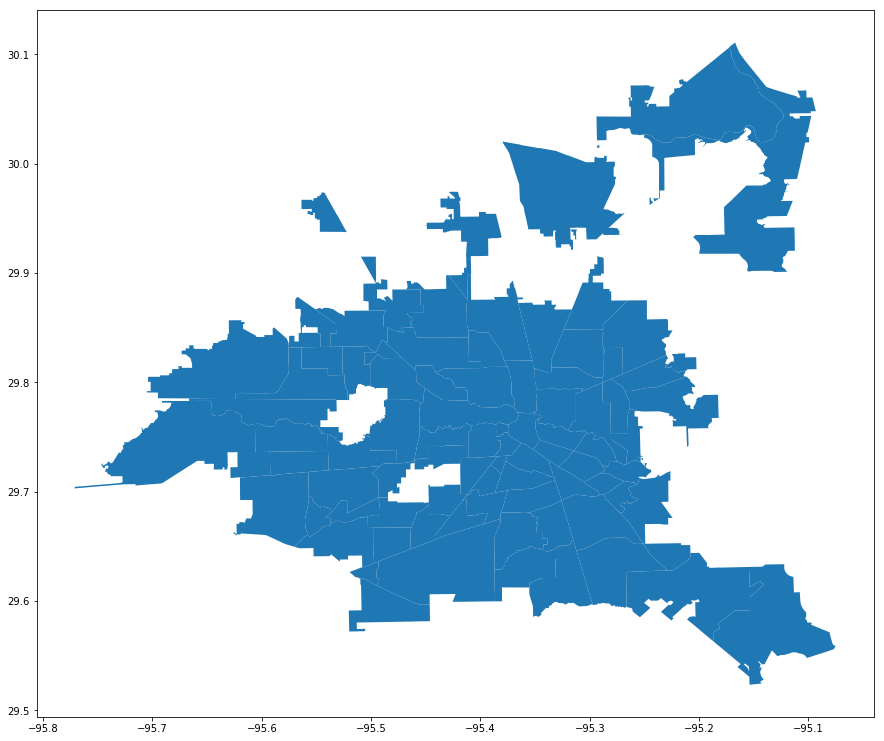

In [82]:
fig,ax = plt.subplots(figsize = (15,15))
htown_map.plot(ax=ax)

In [83]:
# geocode_test["lat"] = geocode_test["lat"].astype(float)
# geocode_test["lon"] = geocode_test["lon"].astype(float)

In [84]:
# geocode_test.head()
crs = {'init':'epsg:4326'}

In [85]:
# geometry = [Point(xy) for xy in zip(geocode_test["lon"], geocode_test["lat"])]
# geometry[:3]

In [86]:
# geo_df = gpd.GeoDataFrame(geocode_test,
#                          crs = crs,
#                          geometry = geometry)

# geo_df.head()

In [87]:
# fig,ax = plt.subplots(figsize = (15,15))
# htown_map.plot(ax=ax, alpha = 0.4, color = "grey")
# geo_df.plot(ax=ax, markersize = 20, color = 'blue', marker = "^", label = "Crime")
# plt.legend(prop={"size":15})

## Spatial Join of geocode_test data and Houston Super Neighborhoods

In [88]:
# #Execute Spatial Join
# crime_with_hood = gpd.sjoin(geo_df,htown_map, how = "inner", op ="intersects")

In [89]:
# crime_with_hood.head()

## Now do it with the actual dataset, not the test dataset

In [90]:
merge_test.head()
# merge_test.shape

,X,Y,Address,City,State,Date,Hour,OffenseType,Beats,BlockRange,StreetName,Type,Area_sq_mi,Perimet_mi,Shape_Leng
0,-95.322341,29.801320,4500 WIPPRECHT ST,HOUSTON,TX,1980-05-01,12,Aggravated Assault,7C20,4500-4599,WIPPRECHT,ST,7.085752,11.097944,58597.143714
1,-95.478453,29.731622,5700 RICHMOND AVE,HOUSTON,TX,1984-08-26,1,Theft,18F30,5700-5799,RICHMOND,AVE,3.800086,11.531586,60818.971647
2,-95.299274,29.900101,12200 SWAN RIVER DR,HOUSTON,TX,2000-08-13,17,Theft,8C60,12200-12299,SWAN RIVER,DR,5.796933,14.514369,76635.866451
3,-95.351548,29.692139,6600 LONDON ST,HOUSTON,TX,2001-08-20,20,Theft,14D10,6600-6699,LONDON,ST,3.660579,9.061770,47846.145921
4,-95.492678,29.671037,5900 DUMFRIES DR,HOUSTON,TX,2002-01-01,8,Theft,15E10,5900-5999,DUMFRIES,DR,4.349968,10.083953,53243.272647


In [91]:
merge_test["Y"] = merge_test["Y"].astype(float)
merge_test["X"] = merge_test["X"].astype(float)

In [92]:
geometry = [Point(xy) for xy in zip(merge_test["X"], merge_test["Y"])]
geometry[:3]

In [93]:
htownCrime_df = gpd.GeoDataFrame(merge_test,
                         crs = crs,
                         geometry = geometry)

htownCrime_df.head()

,X,Y,Address,City,State,Date,Hour,OffenseType,Beats,BlockRange,StreetName,Type,Area_sq_mi,Perimet_mi,Shape_Leng,geometry
0,-95.322341,29.801320,4500 WIPPRECHT ST,HOUSTON,TX,1980-05-01,12,Aggravated Assault,7C20,4500-4599,WIPPRECHT,ST,7.085752,11.097944,58597.143714,POINT (-95.32234 29.80132)
1,-95.478453,29.731622,5700 RICHMOND AVE,HOUSTON,TX,1984-08-26,1,Theft,18F30,5700-5799,RICHMOND,AVE,3.800086,11.531586,60818.971647,POINT (-95.47845 29.73162)
2,-95.299274,29.900101,12200 SWAN RIVER DR,HOUSTON,TX,2000-08-13,17,Theft,8C60,12200-12299,SWAN RIVER,DR,5.796933,14.514369,76635.866451,POINT (-95.29927 29.90010)
3,-95.351548,29.692139,6600 LONDON ST,HOUSTON,TX,2001-08-20,20,Theft,14D10,6600-6699,LONDON,ST,3.660579,9.061770,47846.145921,POINT (-95.35155 29.69214)
4,-95.492678,29.671037,5900 DUMFRIES DR,HOUSTON,TX,2002-01-01,8,Theft,15E10,5900-5999,DUMFRIES,DR,4.349968,10.083953,53243.272647,POINT (-95.49268 29.67104)


In [113]:
#Execute Spatial Join
crime_with_hoods = gpd.sjoin(htownCrime_df,htown_map, how = "inner", op ="intersects")

In [114]:
crime_with_hoods.head(50)


,X,Y,Address,City,State,Date,Hour,OffenseType,Beats,BlockRange,StreetName,Type,Area_sq_mi,...,geometry,index_right,OBJECTID,PERIMETER,POLYID,SNBNAME,cohgisCOHG,cohgisCO_1,COUNCIL_AC,RECOGNITIO,SnbrInfoUR,WeCan,Top10
0,-95.322341,29.801320,4500 WIPPRECHT ST,HOUSTON,TX,1980-05-01,12,Aggravated Assault,7C20,4500-4599,WIPPRECHT,ST,7.085752,...,POINT (-95.32234 29.80132),16,18,52352.042,52,KASHMERE GARDENS,0,0,Yes,2000-03-06T00:00:00.000Z,http://www.houstontx.gov/superneighborhoods/52...,Y,None
10,-95.331480,29.803852,4800 SAYERS ST,HOUSTON,TX,2006-08-06,22,Auto Theft,7C20,4800-4899,SAYERS,ST,7.085752,...,POINT (-95.33148 29.80385),16,18,52352.042,52,KASHMERE GARDENS,0,0,Yes,2000-03-06T00:00:00.000Z,http://www.houstontx.gov/superneighborhoods/52...,Y,None
504,-95.327130,29.800429,4400 LOS ANGELES ST,HOUSTON,TX,2009-07-28,9,Auto Theft,7C20,4400-4499,LOS ANGELES,ST,7.085752,...,POINT (-95.32713 29.80043),16,18,52352.042,52,KASHMERE GARDENS,0,0,Yes,2000-03-06T00:00:00.000Z,http://www.houstontx.gov/superneighborhoods/52...,Y,None
633,-95.303058,29.807684,6300 NORTH LP E,HOUSTON,TX,2009-07-31,17,Burglary,7C20,6300-6399,NORTH LP E,NaN,7.085752,...,POINT (-95.30306 29.80768),16,18,52352.042,52,KASHMERE GARDENS,0,0,Yes,2000-03-06T00:00:00.000Z,http://www.houstontx.gov/superneighborhoods/52...,Y,None
1444,-95.326951,29.796888,4300 CRANE ST,HOUSTON,TX,2009-08-02,6,Theft,7C20,4300-4399,CRANE,ST,7.085752,...,POINT (-95.32695 29.79689),16,18,52352.042,52,KASHMERE GARDENS,0,0,Yes,2000-03-06T00:00:00.000Z,http://www.houstontx.gov/superneighborhoods/52...,Y,None
1673,-95.306603,29.797050,6300 CRANE ST,HOUSTON,TX,2009-08-03,6,Aggravated Assault,7C20,6300-6399,CRANE,ST,7.085752,...,POINT (-95.30660 29.79705),16,18,52352.042,52,KASHMERE GARDENS,0,0,Yes,2000-03-06T00:00:00.000Z,http://www.houstontx.gov/superneighborhoods/52...,Y,None
1710,-95.322282,29.797828,4100 WIPPRECHT ST,HOUSTON,TX,2009-08-03,22,Burglary,7C20,4100-4199,WIPPRECHT,ST,7.085752,...,POINT (-95.32228 29.79783),16,18,52352.042,52,KASHMERE GARDENS,0,0,Yes,2000-03-06T00:00:00.000Z,http://www.houstontx.gov/superneighborhoods/52...,Y,None
2023,-95.316860,29.795118,3800 LOCKWOOD DR,HOUSTON,TX,2009-08-04,14,Robbery,7C20,3800-3899,LOCKWOOD,DR,7.085752,...,POINT (-95.31686 29.79512),16,18,52352.042,52,KASHMERE GARDENS,0,0,Yes,2000-03-06T00:00:00.000Z,http://www.houstontx.gov/superneighborhoods/52...,Y,None
2053,-95.316910,29.797056,4000 LOCKWOOD DR,HOUSTON,TX,2009-08-04,10,Aggravated Assault,7C20,4000-4099,LOCKWOOD,DR,7.085752,...,POINT (-95.31691 29.79706),16,18,52352.042,52,KASHMERE GARDENS,0,0,Yes,2000-03-06T00:00:00.000Z,http://www.houstontx.gov/superneighborhoods/52...,Y,None
2590,-95.317071,29.811072,5500 LOCKWOOD DR,HOUSTON,TX,2009-08-05,6,Theft,7C20,5500-5599,LOCKWOOD,DR,7.085752,...,POINT (-95.31707 29.81107),16,18,52352.042,52,KASHMERE GARDENS,0,0,Yes,2000-03-06T00:00:00.000Z,http://www.houstontx.gov/superneighborhoods/52...,Y,None


In [115]:
crime_with_hoods.columns

Index(['X', 'Y', 'Address', 'City', 'State', 'Date', 'Hour', 'OffenseType',
       'Beats', 'BlockRange', 'StreetName', 'Type', 'Area_sq_mi', 'Perimet_mi',
       'Shape_Leng', 'geometry', 'index_right', 'OBJECTID', 'PERIMETER',
       'POLYID', 'SNBNAME', 'cohgisCOHG', 'cohgisCO_1', 'COUNCIL_AC',
       'RECOGNITIO', 'SnbrInfoUR', 'WeCan', 'Top10'],
      dtype='object')

In [125]:
crime_with_hoods_df = pd.DataFrame(crime_with_hoods)

In [126]:
crime_with_hoods_df = pd.DataFrame(crime_with_hoods_df.drop(columns= ['geometry', 'Top10', 'WeCan', 'SnbrInfoUR', 'RECOGNITIO', 'COUNCIL_AC', 'cohgisCO_1', 'cohgisCOHG','index_right', 'OBJECTID']))

In [127]:
crime_with_hoods_df.head()

,X,Y,Address,City,State,Date,Hour,OffenseType,Beats,BlockRange,StreetName,Type,Area_sq_mi,Perimet_mi,Shape_Leng,PERIMETER,POLYID,SNBNAME
0,-95.322341,29.801320,4500 WIPPRECHT ST,HOUSTON,TX,1980-05-01,12,Aggravated Assault,7C20,4500-4599,WIPPRECHT,ST,7.085752,11.097944,58597.143714,52352.042,52,KASHMERE GARDENS
10,-95.331480,29.803852,4800 SAYERS ST,HOUSTON,TX,2006-08-06,22,Auto Theft,7C20,4800-4899,SAYERS,ST,7.085752,11.097944,58597.143714,52352.042,52,KASHMERE GARDENS
504,-95.327130,29.800429,4400 LOS ANGELES ST,HOUSTON,TX,2009-07-28,9,Auto Theft,7C20,4400-4499,LOS ANGELES,ST,7.085752,11.097944,58597.143714,52352.042,52,KASHMERE GARDENS
633,-95.303058,29.807684,6300 NORTH LP E,HOUSTON,TX,2009-07-31,17,Burglary,7C20,6300-6399,NORTH LP E,NaN,7.085752,11.097944,58597.143714,52352.042,52,KASHMERE GARDENS
1444,-95.326951,29.796888,4300 CRANE ST,HOUSTON,TX,2009-08-02,6,Theft,7C20,4300-4399,CRANE,ST,7.085752,11.097944,58597.143714,52352.042,52,KASHMERE GARDENS


In [129]:
crime_with_hoods_df.to_csv('data/HPD_Crime/Crime_09_15.csv',index=False)

In [132]:
crime_with_hoods_df.replace('', np.nan, inplace=True)


In [137]:
crime_with_hoods_df.columns

Index(['X', 'Y', 'Address', 'City', 'State', 'Date', 'Hour', 'OffenseType',
       'Beats', 'BlockRange', 'StreetName', 'Type', 'Area_sq_mi', 'Perimet_mi',
       'Shape_Leng', 'PERIMETER', 'POLYID', 'SNBNAME', 'Year', 'Month', 'Day',
       'Weekday'],
      dtype='object')

In [135]:
crime_with_hoods_df['Date'] = pd.to_datetime(crime_with_hoods_df['Date'])

crime_with_hoods_df['Year'] = crime_with_hoods_df['Date'].dt.year
crime_with_hoods_df['Month'] = crime_with_hoods_df['Date'].dt.month
crime_with_hoods_df['Day'] = crime_with_hoods_df['Date'].dt.day
crime_with_hoods_df['Weekday'] = crime_with_hoods_df['Date'].dt.dayofweek

In [142]:
crime_with_hoods_df.dtypes

X                     float64
Y                     float64
Address                object
City                   object
State                  object
Date           datetime64[ns]
Hour                   object
OffenseType            object
Beats                  object
BlockRange             object
StreetName             object
Type                   object
Area_sq_mi            float64
Perimet_mi            float64
Shape_Leng            float64
PERIMETER             float64
POLYID                  int64
SNBNAME                object
Year                  float64
Month                 float64
Day                   float64
Weekday               float64
dtype: object

In [146]:
crime_with_hoods_df.isna().sum()

X                  0
Y                  0
Address            0
City               0
State              0
Date               1
Hour               0
OffenseType        0
Beats              1
BlockRange        12
StreetName         0
Type           13486
Area_sq_mi     28881
Perimet_mi     28881
Shape_Leng     28881
PERIMETER          0
POLYID             0
SNBNAME            0
Year               1
Month              1
Day                1
Weekday            1
dtype: int64

In [145]:
crime_with_hoods_df.to_csv('data/HPD_Crime/Crime_09_15.csv',index=False)